In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
cols = ['age','sex','chest_pain','resting_blood_pressure','fasting blood sugar &gt','resting_electrocardiographic_results',
       'maximuma_heartrate_achieved','exercise_induced_angina','ST_depression_induced_by_exercise_relative_to_rest','slope']

In [3]:
df = pd.read_csv("C:\\Users\\priyanka singh\\Downloads\\Clustering Heart Disease Patient Data\\Project-2\\heart_disease_patients.csv",
                )
df.head()

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   63    1   1       145   233    1        2      150      0      2.3   
1   2   67    1   4       160   286    0        2      108      1      1.5   
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   

   slope  
0      3  
1      2  
2      2  
3      3  
4      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [5]:
df.describe()

id         age         sex          cp    trestbps        chol  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868    3.158416  131.689769  246.693069   
std     87.612784    9.038662    0.467299    0.960126   17.599748   51.776918   
min      1.000000   29.000000    0.000000    1.000000   94.000000  126.000000   
25%     76.500000   48.000000    0.000000    3.000000  120.000000  211.000000   
50%    152.000000   56.000000    1.000000    3.000000  130.000000  241.000000   
75%    227.500000   61.000000    1.000000    4.000000  140.000000  275.000000   
max    303.000000   77.000000    1.000000    4.000000  200.000000  564.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.148515    0.990099  149.607261    0.326733    1.039604    1.600660  
std      0.356198    0.994971   22.875003    0.469794    1.161075    0.616226  
min      0.000000    0.000000   71.000000    0.000000    0.000000    1.000000  
25%      0.000000    0.000000  133.500000    0.000000    0.000000    1.000000  
50%      0.000000    1.000000  153.000000    0.000000    0.800000    2.000000  
75%      0.000000    2.000000  166.000000    1.000000    1.600000    2.000000  
max      1.000000    2.000000  202.000000    1.000000    6.200000    3.000000

In [6]:
df.rename(columns = {'cp':'chest_pain','trestbps':'resting_blood_pressure','fbs':'fasting blood sugar &gt','restecg':'resting_electrocardiographic_results',
           'thalach':'maximuma_heartrate_achieved','exang':'exercise_induced_angina','oldpeak':'ST_depression_induced_by_exercise_relative_to_rest',
           },inplace=True)

In [7]:
df.isnull().sum()

id                                                    0
age                                                   0
sex                                                   0
chest_pain                                            0
resting_blood_pressure                                0
chol                                                  0
fasting blood sugar &gt                               0
resting_electrocardiographic_results                  0
maximuma_heartrate_achieved                           0
exercise_induced_angina                               0
ST_depression_induced_by_exercise_relative_to_rest    0
slope                                                 0
dtype: int64

In [8]:
df['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76], dtype=int64)

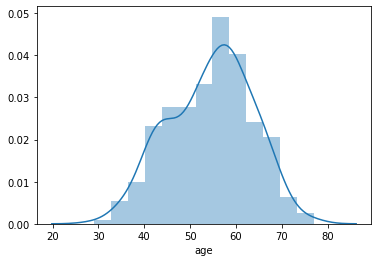

In [9]:
sns.distplot(df['age'])
plt.show()

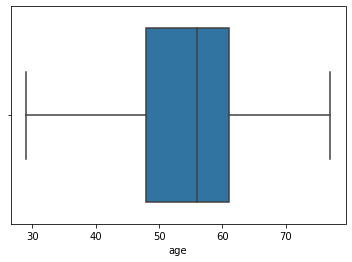

In [10]:
sns.boxplot(df['age'])
plt.show()

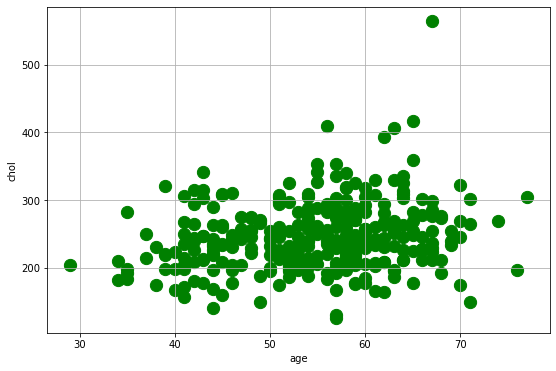

In [11]:
plt.figure(figsize=(9,6))
plt.scatter(df['age'],df['chol'],color = 'green',s = 150)
plt.xlabel('age')
plt.ylabel('chol')
plt.grid()
plt.show()

In [12]:
#Here we can see that people between the age of 40 to 70 ahve more cholestrol 

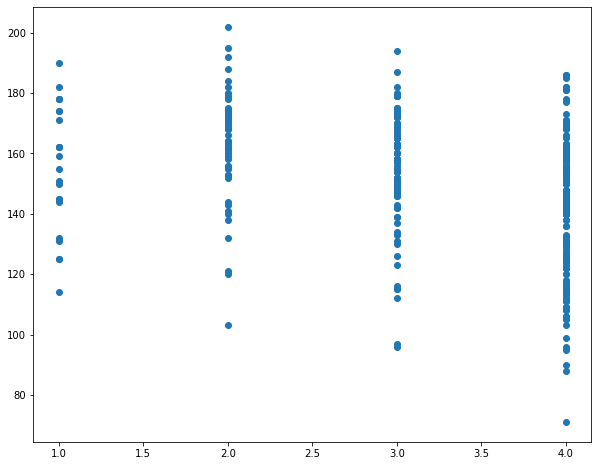

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(df['chest_pain'],df['maximuma_heartrate_achieved'])
plt.show()

In [14]:
df['sex'].value_counts()

1    206
0     97
Name: sex, dtype: int64

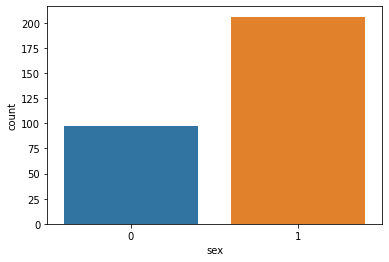

In [15]:
sns.countplot(df['sex'])

In [16]:
df['chest_pain'].value_counts()

4    144
3     86
2     50
1     23
Name: chest_pain, dtype: int64

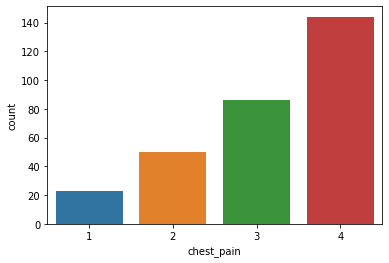

In [17]:
sns.countplot(df['chest_pain'])

In [18]:
df['resting_blood_pressure'].value_counts().head()

120    37
130    36
140    32
110    19
150    17
Name: resting_blood_pressure, dtype: int64

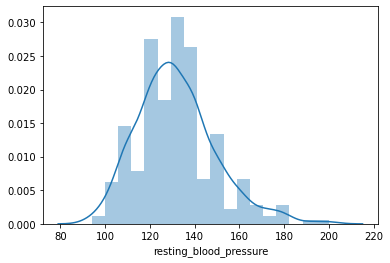

In [19]:
sns.distplot(df['resting_blood_pressure'])

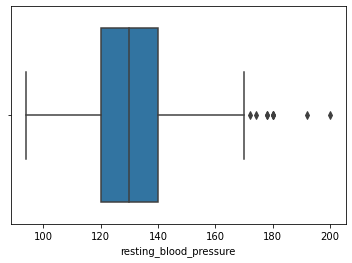

In [20]:
sns.boxplot(df['resting_blood_pressure'])

In [21]:
q1 = df['resting_blood_pressure'].quantile(0.25)
q3 = df['resting_blood_pressure'].quantile(0.75)
iqr = q3-q1

In [22]:
df['resting_blood_pressure'] = np.where(df['resting_blood_pressure']<q1-1.5*iqr,q1-1.5*iqr,df['resting_blood_pressure'])
df['resting_blood_pressure'] = np.where(df['resting_blood_pressure']>q3+1.5*iqr,q3+1.5*iqr,df['resting_blood_pressure'])

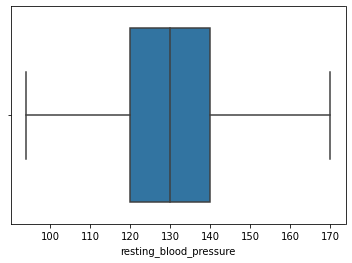

In [23]:
sns.boxplot(df['resting_blood_pressure'])

In [24]:
df['chol'].value_counts().head()

234    6
204    6
197    6
212    5
254    5
Name: chol, dtype: int64

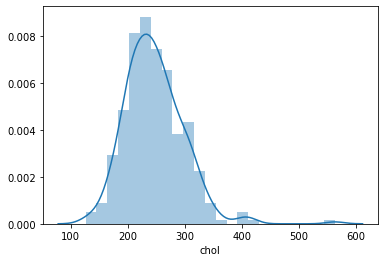

In [25]:
sns.distplot(df['chol'])

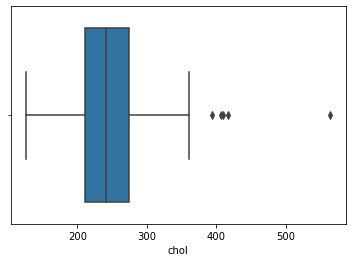

In [26]:
sns.boxplot(df['chol'])

In [27]:
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75)
iqr = q3-q1
df['chol'] = np.where(df['chol']<q1-1.5*iqr,q1-1.5*iqr,df['chol'])
df['chol'] = np.where(df['chol']>q3+1.5*iqr,q3+1.5*iqr,df['chol'])

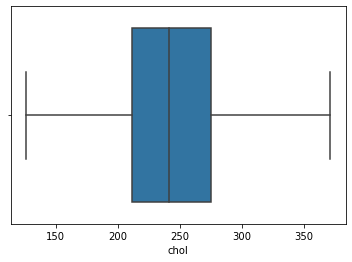

In [28]:
sns.boxplot(df['chol'])

In [29]:
df['fasting blood sugar &gt'].value_counts()

0    258
1     45
Name: fasting blood sugar &gt, dtype: int64

In [30]:
df['resting_electrocardiographic_results'].value_counts()

0    151
2    148
1      4
Name: resting_electrocardiographic_results, dtype: int64

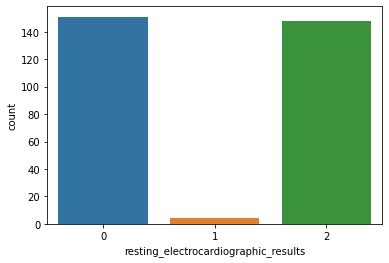

In [31]:
sns.countplot(df['resting_electrocardiographic_results'])

In [32]:
df['maximuma_heartrate_achieved'].value_counts()

162    11
160     9
163     9
152     8
173     7
       ..
129     1
128     1
127     1
124     1
71      1
Name: maximuma_heartrate_achieved, Length: 91, dtype: int64

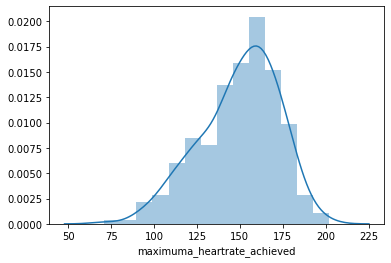

In [33]:
sns.distplot(df['maximuma_heartrate_achieved'])

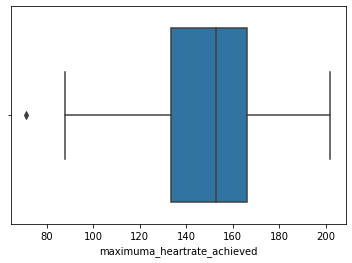

In [34]:
sns.boxplot(df['maximuma_heartrate_achieved'])

In [35]:
q1 = df['maximuma_heartrate_achieved'].quantile(0.25)
q3 = df['maximuma_heartrate_achieved'].quantile(0.75)
iqr = q3-q1
df['maximuma_heartrate_achieved'] = np.where(df['maximuma_heartrate_achieved']<q1-1.5*iqr,q1-1.5*iqr,df['maximuma_heartrate_achieved'])
df['maximuma_heartrate_achieved'] = np.where(df['maximuma_heartrate_achieved']>q3+1.5*iqr,q3+1.5*iqr,df['maximuma_heartrate_achieved'])

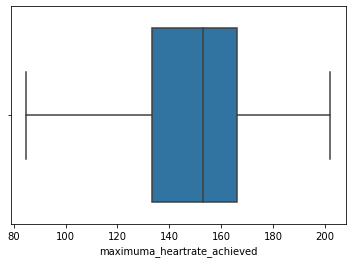

In [36]:
sns.boxplot(df['maximuma_heartrate_achieved'])

In [37]:
df['exercise_induced_angina'].value_counts()

0    204
1     99
Name: exercise_induced_angina, dtype: int64

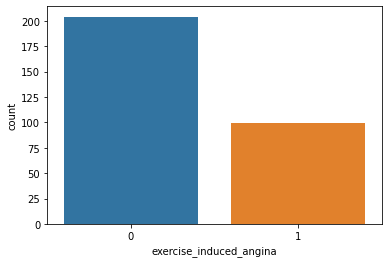

In [38]:
sns.countplot(df['exercise_induced_angina'])

In [39]:
df['ST_depression_induced_by_exercise_relative_to_rest'].value_counts().head()

0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
Name: ST_depression_induced_by_exercise_relative_to_rest, dtype: int64

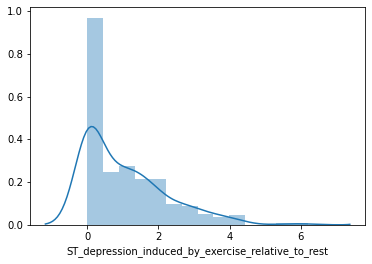

In [40]:
sns.distplot(df['ST_depression_induced_by_exercise_relative_to_rest'])

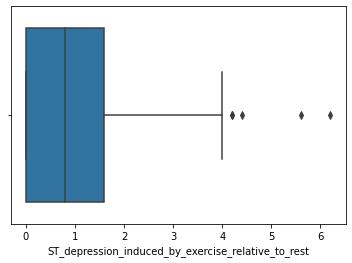

In [41]:
sns.boxplot(df['ST_depression_induced_by_exercise_relative_to_rest'])

In [42]:
q1 = df['ST_depression_induced_by_exercise_relative_to_rest'].quantile(0.25)
q3 = df['ST_depression_induced_by_exercise_relative_to_rest'].quantile(0.75)
iqr = q3-q1
df['ST_depression_induced_by_exercise_relative_to_rest'] = np.where(df['ST_depression_induced_by_exercise_relative_to_rest']<q1-1.5*iqr,q1-1.5*iqr,df['ST_depression_induced_by_exercise_relative_to_rest'])
df['ST_depression_induced_by_exercise_relative_to_rest'] = np.where(df['ST_depression_induced_by_exercise_relative_to_rest']>q3+1.5*iqr,q3+1.5*iqr,df['ST_depression_induced_by_exercise_relative_to_rest'])

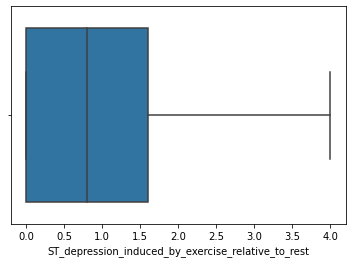

In [43]:
sns.boxplot(df['ST_depression_induced_by_exercise_relative_to_rest'])

In [44]:
df['slope'].value_counts()

1    142
2    140
3     21
Name: slope, dtype: int64

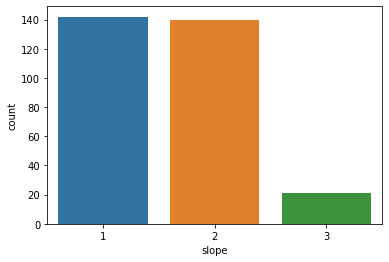

In [45]:
sns.countplot(df['slope'])

In [46]:
df.head(1)

id  age  sex  chest_pain  resting_blood_pressure   chol  \
0   1   63    1           1                   145.0  233.0   

   fasting blood sugar &gt  resting_electrocardiographic_results  \
0                        1                                     2   

   maximuma_heartrate_achieved  exercise_induced_angina  \
0                        150.0                        0   

   ST_depression_induced_by_exercise_relative_to_rest  slope  
0                                                2.3       3

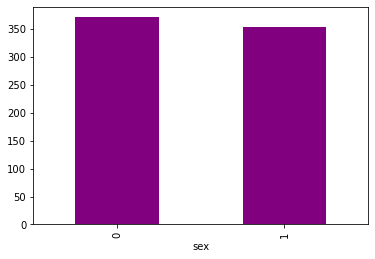

In [47]:
df.groupby(['sex'])['chol'].max().sort_values(ascending=False).head(10).plot.bar(color = 'purple')

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [49]:
X = StandardScaler().fit_transform(df)
X

array([[-1.72634387,  0.94872647,  0.68620244, ..., -0.69663055,
         1.15093843,  2.27457861],
       [-1.71491113,  1.39200191,  0.68620244, ...,  1.43548113,
         0.42910796,  0.64911323],
       [-1.70347839,  1.39200191,  0.68620244, ...,  1.43548113,
         1.42162486,  0.64911323],
       ...,
       [ 1.70347839,  0.28381332,  0.68620244, ...,  1.43548113,
         0.15842154,  0.64911323],
       [ 1.71491113,  0.28381332, -1.4572959 , ..., -0.69663055,
        -0.92432416,  0.64911323],
       [ 1.72634387, -1.82174501,  0.68620244, ..., -0.69663055,
        -0.92432416, -0.97635214]])

In [50]:
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(X)
kmeans.labels_

array([2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2,
       0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1,

In [51]:
kmeans.cluster_centers_

array([[-0.00454281, -0.40752023, -0.06615128, -0.3794457 , -0.16946576,
        -0.08804048, -0.41763453, -0.22337745,  0.57675906, -0.49895132,
        -0.48214325, -0.52423594],
       [ 0.05160467,  0.45054995,  0.0372534 ,  0.58128041,  0.09119954,
         0.126045  , -0.36603687,  0.2593377 , -0.81594965,  0.69217614,
         0.68572201,  0.70876334],
       [-0.11485916,  0.28896768,  0.13786565, -0.14100615,  0.36392047,
        -0.01034399,  2.394438  ,  0.12702758,  0.04297428, -0.00245465,
        -0.04511787,  0.04428891]])

In [52]:
y_predict = kmeans.predict(X)
y_predict

array([2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2,
       0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1,

In [53]:
kmeans.n_features_in_

12

In [54]:
df['cluster'] = y_predict

In [55]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]


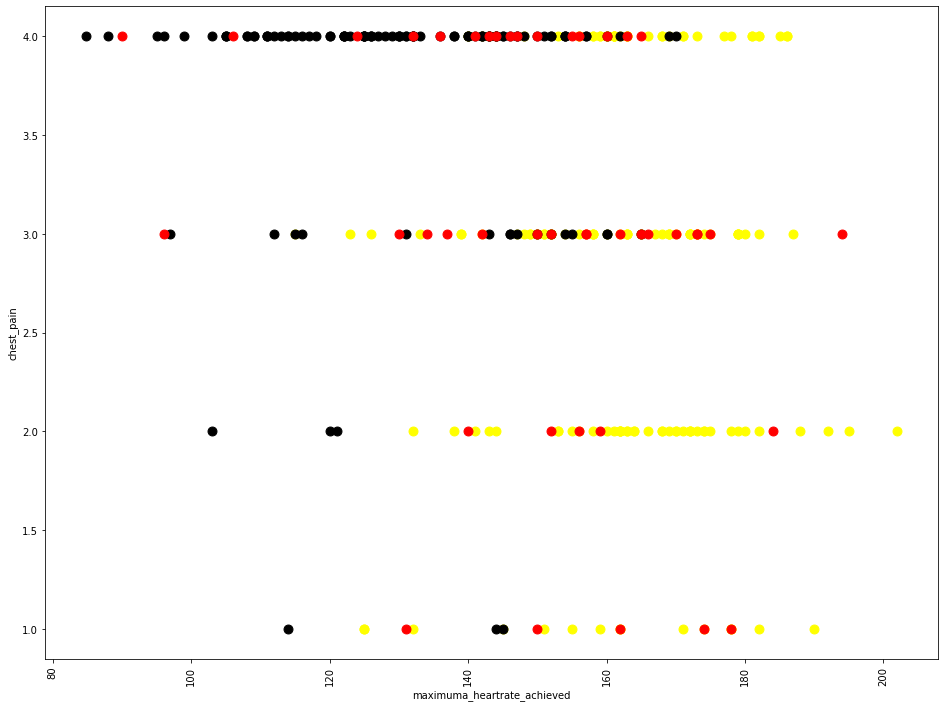

In [56]:
plt.figure(figsize = (16,12))
plt.scatter(df1.maximuma_heartrate_achieved,df1['chest_pain'],color = 'yellow',s = 80)
plt.scatter(df2.maximuma_heartrate_achieved,df2['chest_pain'],color = 'black',s = 80)
plt.scatter(df3.maximuma_heartrate_achieved,df3['chest_pain'],color = 'red',s = 80)

plt.xticks(rotation = 90)
plt.xlabel('maximuma_heartrate_achieved')
plt.ylabel('chest_pain')
plt.show()

In [57]:
df.head()

id  age  sex  chest_pain  resting_blood_pressure   chol  \
0   1   63    1           1                   145.0  233.0   
1   2   67    1           4                   160.0  286.0   
2   3   67    1           4                   120.0  229.0   
3   4   37    1           3                   130.0  250.0   
4   5   41    0           2                   130.0  204.0   

   fasting blood sugar &gt  resting_electrocardiographic_results  \
0                        1                                     2   
1                        0                                     2   
2                        0                                     2   
3                        0                                     0   
4                        0                                     2   

   maximuma_heartrate_achieved  exercise_induced_angina  \
0                        150.0                        0   
1                        108.0                        1   
2                        129.0                        1   
3                        187.0                        0   
4                        172.0                        0   

   ST_depression_induced_by_exercise_relative_to_rest  slope  cluster  
0                                                2.3       3        2  
1                                                1.5       2        1  
2                                                2.6       2        1  
3                                                3.5       3        0  
4                                                1.4       1        0

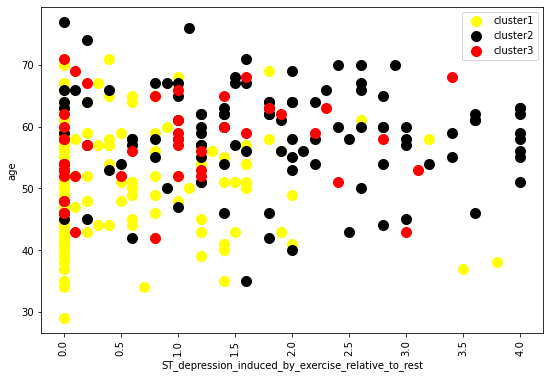

In [58]:
plt.figure(figsize = (9,6))
plt.scatter(df1.ST_depression_induced_by_exercise_relative_to_rest,df1['age'],color = 'yellow',label = 'cluster1',s = 100)
plt.scatter(df2.ST_depression_induced_by_exercise_relative_to_rest,df2['age'],color = 'black',label = 'cluster2',s = 100)
plt.scatter(df3.ST_depression_induced_by_exercise_relative_to_rest,df3['age'],color = 'red',label = 'cluster3',s = 100)

plt.xticks(rotation = 90)
plt.xlabel('ST_depression_induced_by_exercise_relative_to_rest')
plt.ylabel('age')
plt.legend()
plt.show()

### Cluster1 have ST_depression_induced_by_exercise_relative_to_rest mostly between 0.0 to 2, and cluster2 is spreaded all over and third cluster iha the lowest number of data points

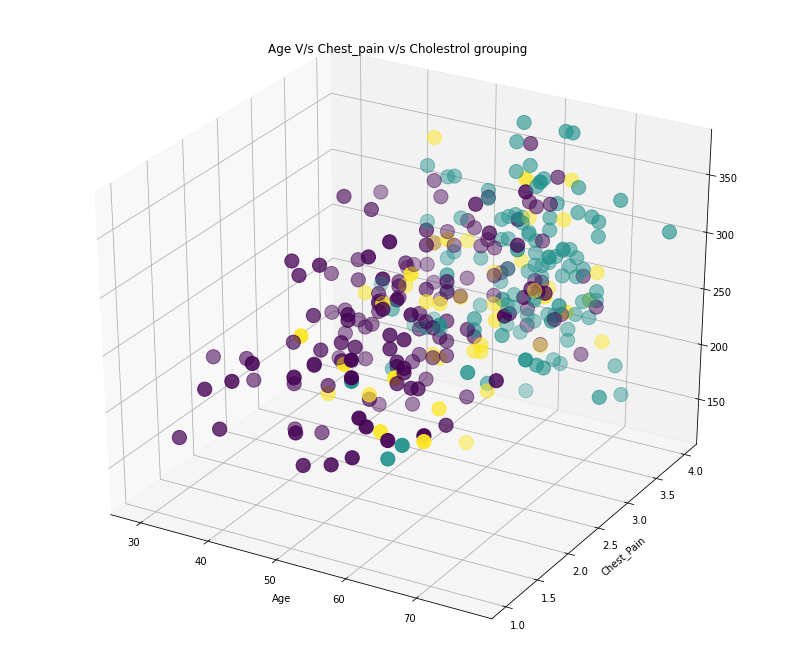

In [59]:
fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection = '3d')

ax.scatter3D(df['age'],df['chest_pain'],df['chol'],c = df['cluster'] , s = 200)
plt.xlabel('Age')
plt.ylabel('Chest_Pain')
plt.title('Age V/s Chest_pain v/s Cholestrol grouping')

plt.show()

In [60]:
df['cluster'].value_counts()

0    151
1    109
2     43
Name: cluster, dtype: int64

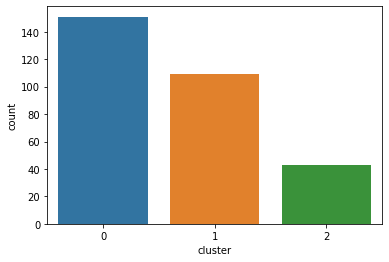

In [61]:
sns.countplot(df['cluster'])

In [62]:
X

array([[-1.72634387,  0.94872647,  0.68620244, ..., -0.69663055,
         1.15093843,  2.27457861],
       [-1.71491113,  1.39200191,  0.68620244, ...,  1.43548113,
         0.42910796,  0.64911323],
       [-1.70347839,  1.39200191,  0.68620244, ...,  1.43548113,
         1.42162486,  0.64911323],
       ...,
       [ 1.70347839,  0.28381332,  0.68620244, ...,  1.43548113,
         0.15842154,  0.64911323],
       [ 1.71491113,  0.28381332, -1.4572959 , ..., -0.69663055,
        -0.92432416,  0.64911323],
       [ 1.72634387, -1.82174501,  0.68620244, ..., -0.69663055,
        -0.92432416, -0.97635214]])

In [63]:
k_cluster = []
for i in range(1,10):
    kmeans2 = KMeans(n_clusters = i,random_state = 42)
    kmeans2.fit(df.iloc[:,:-1])
    k_cluster.append(kmeans2.inertia_)

In [64]:
k_cluster

[3266896.984141913,
 1524191.2909871,
 1166268.0600668904,
 976848.6101577017,
 812705.4313590527,
 722587.7397875697,
 636308.60840462,
 594985.1623017895,
 557458.8861004958]

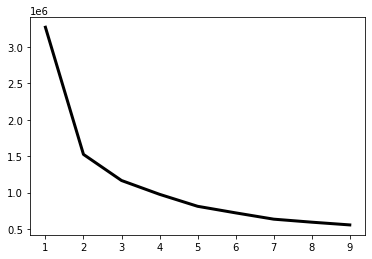

In [65]:
plt.plot(range(1,10),k_cluster,color = 'black',linewidth = 3)

#### From here we can see that 2 clusters are the ideal to group the data

In [66]:
kmeans_ = KMeans(n_clusters = 2,random_state = 42)
kmeans_.fit(df)
y_pred2 = kmeans_.labels_
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
df['cluster1'] = y_pred2

In [68]:
df.head()

id  age  sex  chest_pain  resting_blood_pressure   chol  \
0   1   63    1           1                   145.0  233.0   
1   2   67    1           4                   160.0  286.0   
2   3   67    1           4                   120.0  229.0   
3   4   37    1           3                   130.0  250.0   
4   5   41    0           2                   130.0  204.0   

   fasting blood sugar &gt  resting_electrocardiographic_results  \
0                        1                                     2   
1                        0                                     2   
2                        0                                     2   
3                        0                                     0   
4                        0                                     2   

   maximuma_heartrate_achieved  exercise_induced_angina  \
0                        150.0                        0   
1                        108.0                        1   
2                        129.0                        1   
3                        187.0                        0   
4                        172.0                        0   

   ST_depression_induced_by_exercise_relative_to_rest  slope  cluster  \
0                                                2.3       3        2   
1                                                1.5       2        1   
2                                                2.6       2        1   
3                                                3.5       3        0   
4                                                1.4       1        0   

   cluster1  
0         1  
1         1  
2         1  
3         1  
4         1

In [69]:
labels = kmeans.predict(X)

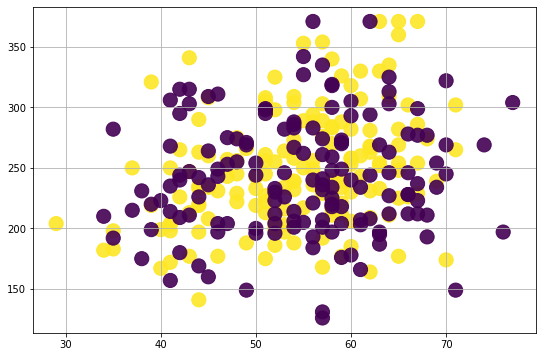

In [70]:
plt.figure(figsize=(9,6))
plt.scatter(df['age'],df['chol'],c = y_pred2,s = 200,alpha = 0.9)
plt.grid()
plt.show()

In [71]:
df.head(1)

id  age  sex  chest_pain  resting_blood_pressure   chol  \
0   1   63    1           1                   145.0  233.0   

   fasting blood sugar &gt  resting_electrocardiographic_results  \
0                        1                                     2   

   maximuma_heartrate_achieved  exercise_induced_angina  \
0                        150.0                        0   

   ST_depression_induced_by_exercise_relative_to_rest  slope  cluster  \
0                                                2.3       3        2   

   cluster1  
0         1

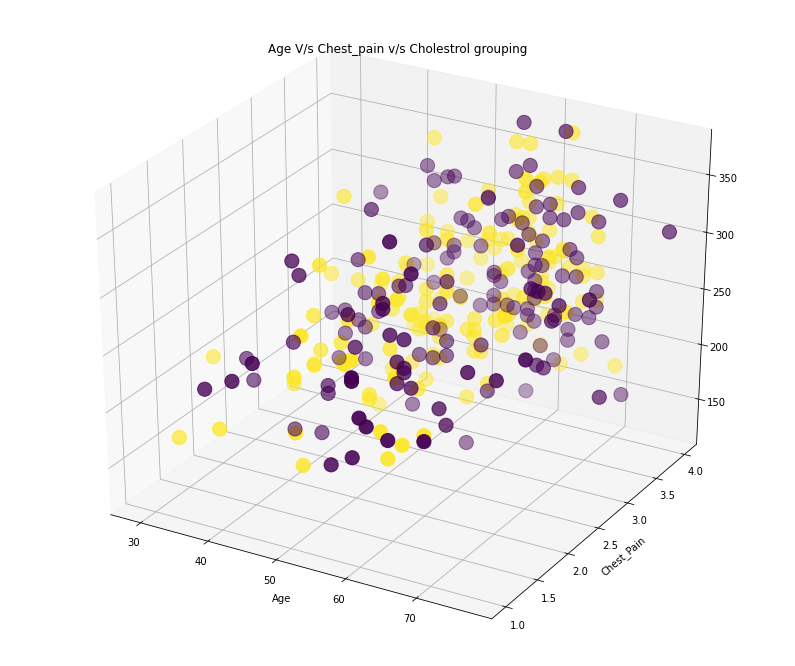

In [72]:
fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection = '3d')

ax.scatter3D(df['age'],df['chest_pain'],df['chol'],c = y_pred2,s = 200)
plt.xlabel('Age')
plt.ylabel('Chest_Pain')
plt.title('Age V/s Chest_pain v/s Cholestrol grouping')

plt.show()

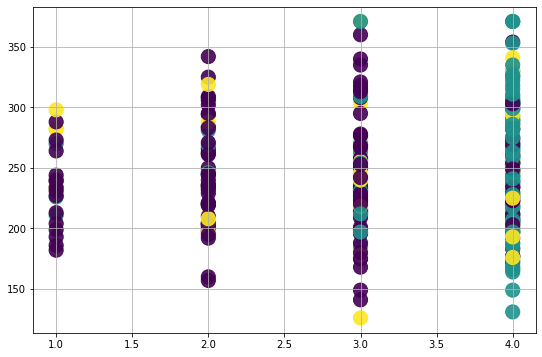

In [73]:
plt.figure(figsize=(9,6))
plt.scatter(df['chest_pain'],df['chol'],c = labels,s = 200,alpha = 0.9)
plt.grid()
plt.show()

In [74]:
df1_ = df[df['cluster1']==1]
df2_ = df[df['cluster1']==0]

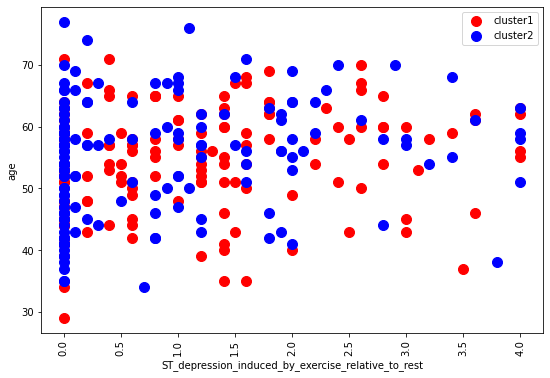

In [75]:
#Second Cluster
plt.figure(figsize = (9,6))
plt.scatter(df1_.ST_depression_induced_by_exercise_relative_to_rest,df1_['age'],color = 'red',label = 'cluster1',s = 100)
plt.scatter(df2_.ST_depression_induced_by_exercise_relative_to_rest,df2_['age'],color = 'blue',label = 'cluster2',s = 100)

plt.xticks(rotation = 90)
plt.xlabel('ST_depression_induced_by_exercise_relative_to_rest')
plt.ylabel('age')
plt.legend()
plt.show()

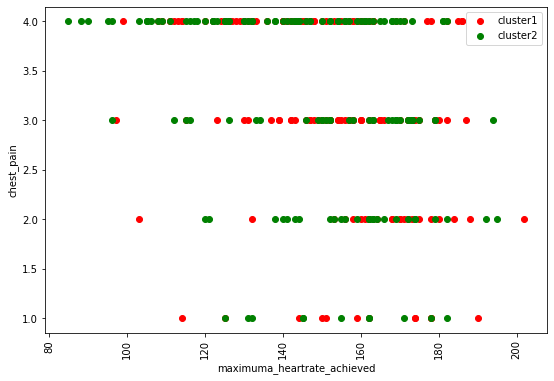

In [76]:
plt.figure(figsize = (9,6))
plt.scatter(df1_.maximuma_heartrate_achieved,df1_['chest_pain'],color = 'red',label = 'cluster1')
plt.scatter(df2_.maximuma_heartrate_achieved,df2_['chest_pain'],color = 'green',label = 'cluster2')

plt.xticks(rotation = 90)
plt.xlabel('maximuma_heartrate_achieved')
plt.ylabel('chest_pain')
plt.legend()
plt.show()

Here we can make out that 
#1.there are very few people with level of chest pain1 in both cluster  who have heart rate between 120 to 180 But as we move ahead with the

#2.chest_pain of level 2 are most in cluster 2 between 120 to 200 approx heart rateand also few in cluster1 also with same max heart rate

#3.Bit more increase in people with chest_pain level of 3 in the both the categories

#4.Thre are maximum people with chest pain level of 4 in cluster 2 ranging from max heart rate of 80 to 200. And also some in 
#cluster 1 so we can say that clsuter 2 is more severe as comapred to 1


In [77]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import gc
import plotly.offline as py

In [78]:
tsne3d = TSNE(n_components = 3,random_state = 101,init = 'random',method = 'barnes_hut',
              n_iter = 1000,verbose = 2,angle = 0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.055s...
[t-SNE] Computed neighbors for 303 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 1.582914
[t-SNE] Computed conditional probabilities in 0.024s
[t-SNE] Iteration 50: error = 81.6205597, gradient norm = 0.3521324 (50 iterations in 0.203s)
[t-SNE] Iteration 100: error = 98.3624039, gradient norm = 0.2778202 (50 iterations in 0.213s)
[t-SNE] Iteration 150: error = 114.8112335, gradient norm = 0.2331449 (50 iterations in 0.171s)
[t-SNE] Iteration 200: error = 123.2665024, gradient norm = 0.2175544 (50 iterations in 0.209s)
[t-SNE] Iteration 250: error = 128.5861664, gradient norm = 0.2072589 (50 iterations in 0.203s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 128.586166
[t-SNE] Iteration 300: error = 3.7148585, gradient norm = 0.0004994 (50 iterations in 0.201s)
[t-SNE] Iteration 350: error = 3.2567589, gradient norm = 0.00020

In [79]:
y = df['cluster']

In [80]:
trace1 = go.Scatter3d(x = tsne3d[:,0],y = tsne3d[:,1],z = tsne3d[:,2],mode='markers',marker = dict(sizemode = 'diameter',color = y,
                                                                                                  colorscale = 'Portland',colorbar = dict(title = 'duplicate'),
                                                                                                  line = dict(color = 'rgb(255,255,255)'),opacity = 0.9))

In [81]:
d1 = [trace1]
layout = dict(height = 800,width = 800,title = '3d diagram of independent features')
fig = dict(data = d1,layout =layout)
py.iplot(fig,filename='3DBubble')

In [82]:
#When we have 2 clusters
y = df['cluster1']

In [83]:
trace1 = go.Scatter3d(x = tsne3d[:,0],y = tsne3d[:,1],z = tsne3d[:,2],mode='markers',marker = dict(sizemode = 'diameter',color = y,
                                                                                                  colorscale = 'Portland',colorbar = dict(title = 'duplicate'),
                                                                                                  line = dict(color = 'rgb(256,254,255)'),opacity = 0.75))

In [84]:
d1 = [trace1]
layout = dict(height = 800,width = 800,title = '3d diagram of independent features')
fig = dict(data = d1,layout =layout)
py.iplot(fig,filename='3DBubble')

In [85]:
df.head(1)

id  age  sex  chest_pain  resting_blood_pressure   chol  \
0   1   63    1           1                   145.0  233.0   

   fasting blood sugar &gt  resting_electrocardiographic_results  \
0                        1                                     2   

   maximuma_heartrate_achieved  exercise_induced_angina  \
0                        150.0                        0   

   ST_depression_induced_by_exercise_relative_to_rest  slope  cluster  \
0                                                2.3       3        2   

   cluster1  
0         1

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
silhouette_score(X,df['cluster'])

0.16042387190282315

Here 2 no. clusters gives us a better approach as compared to 3. .After checking in 3d we will realize that the data is quite jumbled


## Hierarchical clustering

In [88]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [89]:
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(X)

AgglomerativeClustering()

In [90]:
ypred_hc = hc.labels_
ypred_hc

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [91]:
df.drop(columns = ['cluster','cluster1'],axis = 1,inplace=True)

In [92]:
df['cluster_hc'] = ypred_hc

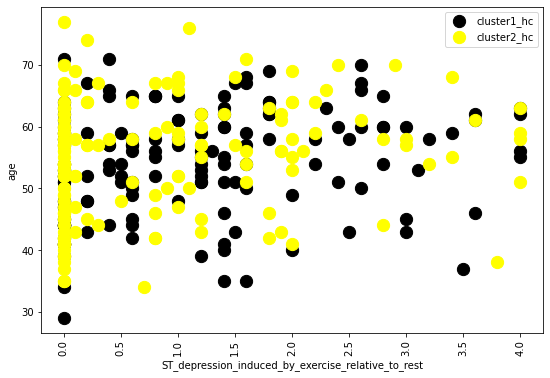

In [93]:
plt.figure(figsize = (9,6))
plt.scatter(df1_.ST_depression_induced_by_exercise_relative_to_rest,df1_['age'],color = 'black',label = 'cluster1_hc',s = 150)
plt.scatter(df2_.ST_depression_induced_by_exercise_relative_to_rest,df2_['age'],color = 'yellow',label = 'cluster2_hc',s = 150)

plt.xticks(rotation = 90)
plt.xlabel('ST_depression_induced_by_exercise_relative_to_rest')
plt.ylabel('age')
plt.legend()
plt.show()

Here we can see that people between age group 30 to 70 and st_depression_induced_excersize level of 0 to 2 falls in cluster1_hc and people with more than 2 st_depression_induced_excersize falls in cluster 2_hcThreby making cluster2_hc more severs

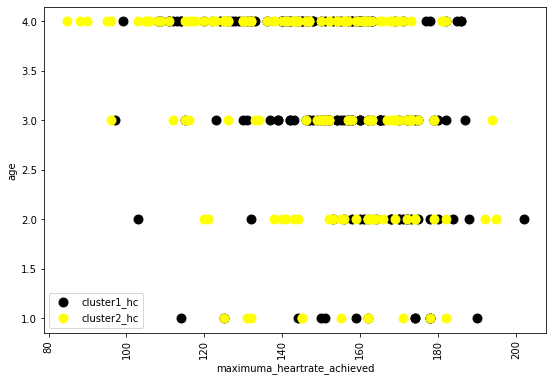

In [94]:
plt.figure(figsize = (9,6))
plt.scatter(df1_.maximuma_heartrate_achieved,df1_['chest_pain'],color = 'black',label = 'cluster1_hc',s = 80)
plt.scatter(df2_.maximuma_heartrate_achieved,df2_['chest_pain'],color = 'yellow',label = 'cluster2_hc',s = 80)

plt.xticks(rotation = 90)
plt.xlabel('maximuma_heartrate_achieved')
plt.ylabel('age')
plt.legend()
plt.show()

In [95]:
df.head(2)

id  age  sex  chest_pain  resting_blood_pressure   chol  \
0   1   63    1           1                   145.0  233.0   
1   2   67    1           4                   160.0  286.0   

   fasting blood sugar &gt  resting_electrocardiographic_results  \
0                        1                                     2   
1                        0                                     2   

   maximuma_heartrate_achieved  exercise_induced_angina  \
0                        150.0                        0   
1                        108.0                        1   

   ST_depression_induced_by_exercise_relative_to_rest  slope  cluster_hc  
0                                                2.3       3           0  
1                                                1.5       2           0

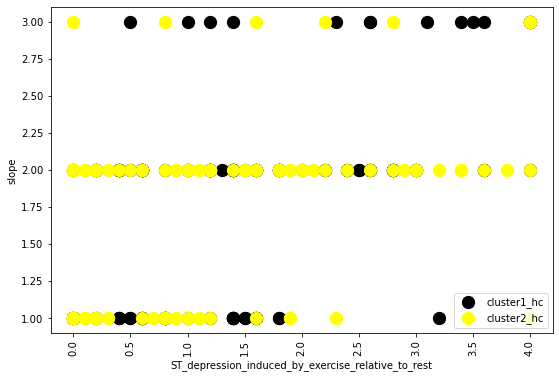

In [96]:
plt.figure(figsize = (9,6))
plt.scatter(df1_.ST_depression_induced_by_exercise_relative_to_rest,df1_['slope'],color = 'black',label = 'cluster1_hc',s = 150)
plt.scatter(df2_.ST_depression_induced_by_exercise_relative_to_rest,df2_['slope'],color = 'yellow',label = 'cluster2_hc',s = 150)

plt.xticks(rotation = 90)
plt.xlabel('ST_depression_induced_by_exercise_relative_to_rest')
plt.ylabel('slope')
plt.legend()
plt.show()

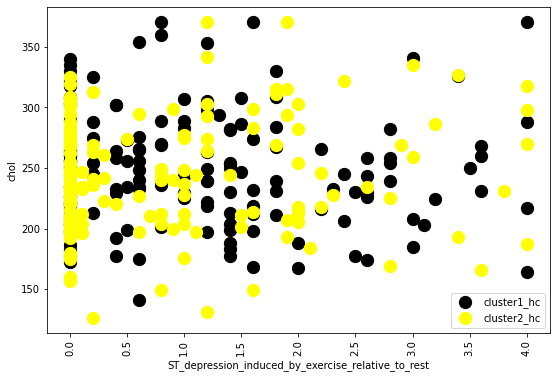

In [97]:
plt.figure(figsize = (9,6))
plt.scatter(df1_.ST_depression_induced_by_exercise_relative_to_rest,df1_['chol'],color = 'black',label = 'cluster1_hc',s = 150)
plt.scatter(df2_.ST_depression_induced_by_exercise_relative_to_rest,df2_['chol'],color = 'yellow',label = 'cluster2_hc',s = 150)
plt.xticks(rotation = 90)
plt.xlabel('ST_depression_induced_by_exercise_relative_to_rest')
plt.ylabel('chol')
plt.legend()
plt.show()

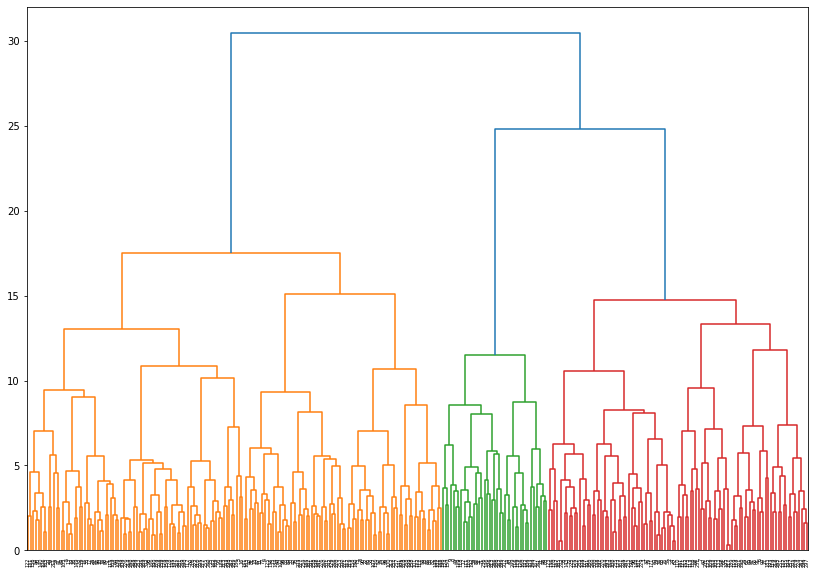

In [98]:
plt.figure(figsize = (14,10))
import scipy.cluster.hierarchy as sch
dendo1 = sch.dendrogram(sch.linkage(X,method = 'ward',metric = 'euclidean'))
plt.xticks(rotation = 90)
plt.show()

#### People within ST_depression_induced_by_exercise_relative_to_rest between 0.0 to 2 having cholestrol of 150-350 are dense and above 2 ST_depression_induced_by_exercise_relative_to_rest is comparatively sparse

In [99]:
#second round of aggomerative hierarchical clustering

In [100]:
agg_clus = AgglomerativeClustering(n_clusters=3)
agg_clus.fit(X)

AgglomerativeClustering(n_clusters=3)

In [101]:
y_pred2_cluster = agg_clus.labels_
y_pred2_cluster

array([2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1,

In [102]:
df['cluster2_hc'] = y_pred2_cluster

In [103]:
df1_ = df[df['cluster2_hc']==0]
df2_ = df[df['cluster2_hc']==1]
df3_ = df[df['cluster2_hc']==2]

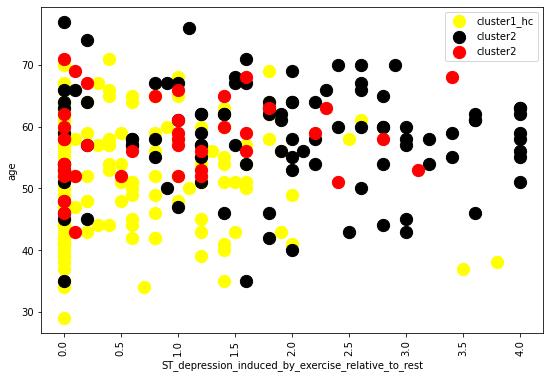

In [104]:
plt.figure(figsize = (9,6))
plt.scatter(df1_.ST_depression_induced_by_exercise_relative_to_rest,df1_['age'],color = 'yellow',label = 'cluster1_hc',s = 150)
plt.scatter(df2_.ST_depression_induced_by_exercise_relative_to_rest,df2_['age'],color = 'black',label = 'cluster2',s = 150)
plt.scatter(df3_.ST_depression_induced_by_exercise_relative_to_rest,df3_['age'],color = 'red',label = 'cluster2',s = 150)
            
plt.xticks(rotation = 90)
plt.xlabel('ST_depression_induced_by_exercise_relative_to_rest')
plt.ylabel('age')
plt.legend()
plt.show()

### Here we can make out that people having st_depressed_induces_by_excersixe_relative_to_rest between 0 to 1.5 and age group of 35 to 70 falls in one category and people with st_depressed_induces_by_excersixe_relative_to_rest between 1.5 to 4 in other category and people with age between 45 to 70 with sparsely spready spread st_depressed_induces_by_excersixe_relative_to_rest fall in one category

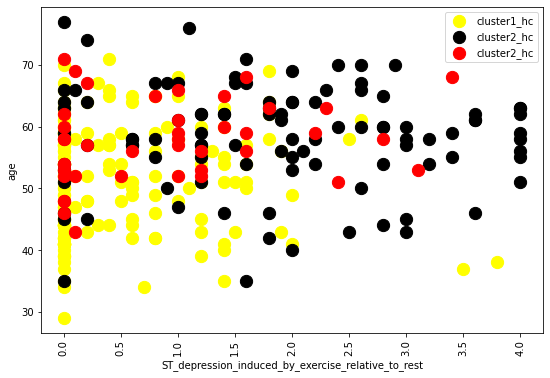

In [106]:
plt.figure(figsize = (9,6))
plt.scatter(df1_.ST_depression_induced_by_exercise_relative_to_rest,df1_['age'],color = 'yellow',label = 'cluster1_hc',s = 150)
plt.scatter(df2_.ST_depression_induced_by_exercise_relative_to_rest,df2_['age'],color = 'black',label = 'cluster2_hc',s = 150)
plt.scatter(df3_.ST_depression_induced_by_exercise_relative_to_rest,df3_['age'],color = 'red',label = 'cluster2_hc',s = 150)

plt.xticks(rotation = 90)
plt.xlabel('ST_depression_induced_by_exercise_relative_to_rest')
plt.ylabel('age')
plt.legend()
plt.show()

In [107]:
df.head(2)

id  age  sex  chest_pain  resting_blood_pressure   chol  \
0   1   63    1           1                   145.0  233.0   
1   2   67    1           4                   160.0  286.0   

   fasting blood sugar &gt  resting_electrocardiographic_results  \
0                        1                                     2   
1                        0                                     2   

   maximuma_heartrate_achieved  exercise_induced_angina  \
0                        150.0                        0   
1                        108.0                        1   

   ST_depression_induced_by_exercise_relative_to_rest  slope  cluster_hc  \
0                                                2.3       3           0   
1                                                1.5       2           0   

   cluster2_hc  
0            2  
1            1

In [108]:
y = df['cluster_hc']

trace1 = go.Scatter3d(x = tsne3d[:,0],y = tsne3d[:,1],z = tsne3d[:,2],mode='markers',marker = dict(sizemode = 'diameter',color = y,
                                                                                                  colorscale = 'Portland',colorbar = dict(title = 'duplicate'),
                                                                                                  line = dict(color = 'rgb(100,100,100)'),opacity = 0.75))

In [109]:
d1 = [trace1]
layout = dict(height = 800,width = 800,title = '3d diagram of independent features')
fig = dict(data = d1,layout =layout)
py.iplot(fig,filename='3DBubble')

In [110]:
y = df['cluster2_hc']

trace1 = go.Scatter3d(x = tsne3d[:,0],y = tsne3d[:,1],z = tsne3d[:,2],mode='markers',marker = dict(sizemode = 'diameter',color = y,
                                                                                                  colorscale = 'Portland',colorbar = dict(title = 'duplicate'),
                                                                                                  line = dict(color = 'rgb(255,255,255)'),opacity = 0.75))

In [111]:
d1 = [trace1]
layout = dict(height = 800,width = 800,title = '3d diagram of independent features')
fig = dict(data = d1,layout =layout)
py.iplot(fig,filename='3DBubble')

In [112]:
#Here in Hierarchical we can separate data comparatively well as compare to kmeans

In [113]:
silhouette_score(X,df['cluster2_hc'])

0.15199324258827276